**Importing Required Libraries**

Import the required libraries for the project to the Colab environment.

Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**Import the Data**

Create a Dataframe that contains the "insurance.csv" information.

In [187]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Perform An Exploratory Data Analysis**

Analyze the data and draw meaningful conclusions from the data.

Examine the distribution of Bmi (Body Mass Index)

<function matplotlib.pyplot.show(*args, **kw)>

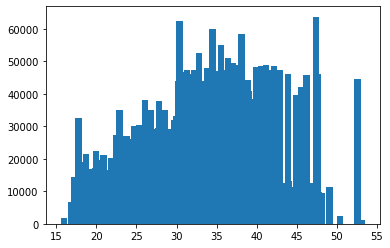

In [188]:
plt.bar(data['bmi'], data['charges'])
plt.show
# There seems to be a correlation between bmi and the charges a person pays and their BMI.

Examine the relationship between “smoker” and “charges”

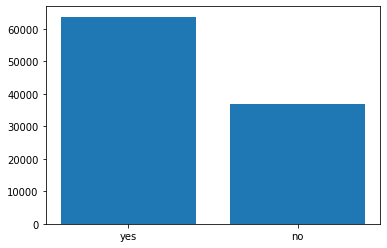

In [189]:
plt.bar(data['smoker'], data['charges'])
plt.show()
# Smokers have more insurance charges than non-smokers

Examine the relationship between “smoker” and “region”.

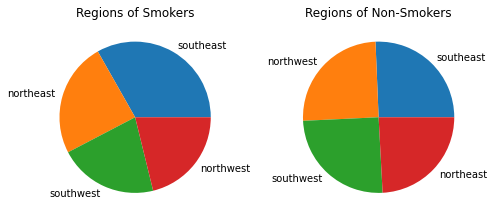

In [190]:
smoker_regions = data[data['smoker'] == 'yes']['region'].value_counts()
non_smoker_regions = data[data['smoker'] == 'no']['region'].value_counts()

fig = plt.figure(figsize = (8, 16))

smoker_pie = fig.add_subplot(4, 2, 1)
smoker_pie.pie(smoker_regions, labels = smoker_regions.index)
smoker_pie.set_title("Regions of Smokers")

non_smoker_pie = fig.add_subplot(4, 2, 2)
non_smoker_pie.pie(non_smoker_regions, labels = non_smoker_regions.index)
non_smoker_pie.set_title("Regions of Non-Smokers")

fig.show()
# Smokers tend to reside in the southeast region

Examine the relationship between “bmi” and “sex”.

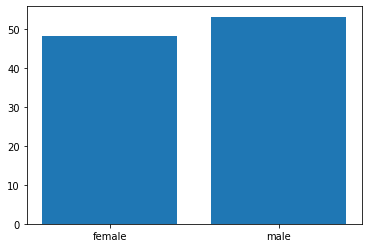

In [191]:
plt.bar(data['sex'], data['bmi'])
plt.show()
# Overall, males have higher BMIs then females

Find the "region" with the most "children".

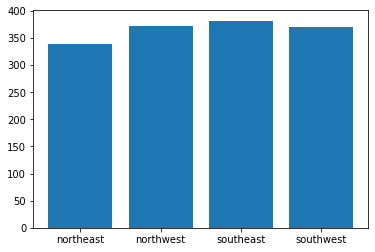

In [192]:
NE_children = data[data['region'] == 'northeast']['children'].sum()
NW_children = data[data['region'] == 'northwest']['children'].sum()
SE_children = data[data['region'] == 'southeast']['children'].sum()
SW_children = data[data['region'] == 'southwest']['children'].sum()
plt.bar(['northeast', 'northwest', 'southeast', 'southwest'], [NE_children, NW_children, SE_children, SW_children])
plt.show()
# The southeast region has the most children

Examine the relationship between “age” and “bmi”.

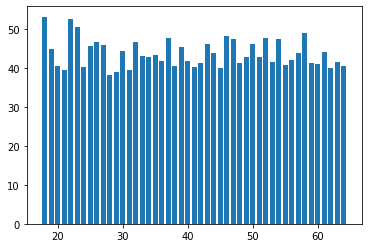

In [193]:
plt.bar(data['age'], data['bmi'])
plt.show()
# BMI does not seem to have correlation to age 

Examine the relationship between “bmi” and “children”.

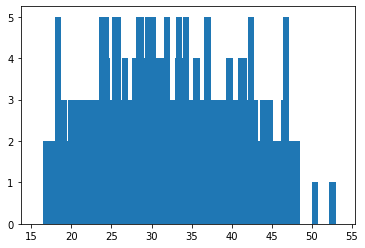

In [194]:
plt.bar(data['bmi'], data['children'])
plt.show()
# There seems to be little correlation between number of children and BMI

Is there an outlier in the "bmi" variable? Please review.

In [195]:
bmi_stats = data['bmi'].describe()
bmi_iqr = bmi_stats['75%'] - bmi_stats['25%']
bmi_threshold = [bmi_stats['25%'] - bmi_iqr * 1.5, bmi_stats['75%'] + bmi_iqr * 1.5]
print(bmi_stats)
print(bmi_threshold)
# Because there are values of BMI greater than the BMI's third_quartile + IQR * 1.5, it is statistically proven that there are outliers
# Data entries with BMI either <13.7 or >47.290000000000006 should be removed from the data

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
[13.7, 47.290000000000006]


Examine the relationship between “bmi” and “charges”.

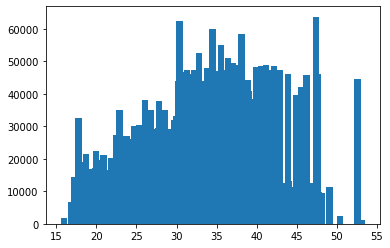

In [196]:
plt.bar(data['bmi'], data['charges'])
plt.show()
# There seems to be a correlation between the charges paid and BMI

Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

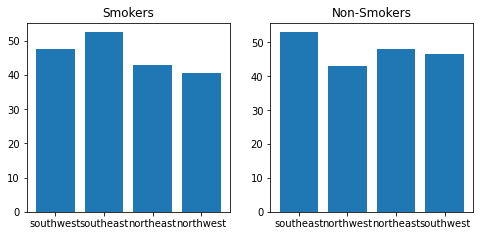

In [197]:
smoker_regions = data[data['smoker'] == 'yes']['region']
non_smoker_regions = data[data['smoker'] == 'no']['region']

fig = plt.figure(figsize = (8, 16))

smoker_bar = fig.add_subplot(4, 2, 1)
smoker_bar.bar(smoker_regions, data[data['smoker'] == 'yes']['bmi'])
smoker_bar.set_title("Smokers")

non_smoker_bar = fig.add_subplot(4, 2, 2)
non_smoker_bar.bar(non_smoker_regions, data[data['smoker'] == 'no']['bmi'])
non_smoker_bar.set_title("Non-Smokers")

fig.show()
# Smokers have higher BMIs in the southeast region
# Non-Smokers also have higher BMIs in the southeast region

 **Data Preprocessing**

 In this section, prepare the data you have, for training the model.

 Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.

In [198]:
labelEncoder = LabelEncoder()
data['sex'] = labelEncoder.fit_transform(data['sex'])
data['smoker'] = labelEncoder.fit_transform(data['smoker'])
data['region'] = labelEncoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Split your dataset into X_train,X_test, y_train, y_test.

In [199]:
train, test = train_test_split(data, test_size=0.3)

X_train = train.drop('charges', axis=1)
Y_train = train.loc[:, 'charges']

X_test = test.drop('charges', axis=1)
Y_test = test.loc[:, 'charges']

Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

In [200]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.fit_transform(X_test)

**Model Selection**

Select several regression models and train them with the preprocessed data.

Examine the performances of the selected models using cross validation.

Choose the best performing model

In [201]:
# LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
linear_predictions = linReg.predict(X_test)
linear_mse = mean_squared_error(Y_test, linear_predictions)
linear_mse

37696221.83705737

In [202]:
# RidgeRegression
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train, Y_train)
ridge_predictions = ridgeReg.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_predictions)
ridge_mse
# Because the RidgeRegression has a lower MSE, the RidgeRegression will be used.

37682924.2510238

**Hyper-parameter Optimization**

Optimize the hyper-parameters of the model selected in the previous step.

In [203]:
# Remove the BMI outliers found
optimized_data = data[data['bmi'] > bmi_threshold[0]]
optimized_data = optimized_data[optimized_data['bmi'] < bmi_threshold[1]]
print(data.shape)
print(optimized_data.shape)

(1338, 7)
(1329, 7)


In [204]:
# Recreate the train test split.
optimized_train, optimized_test = train_test_split(optimized_data, test_size=0.3)

optimized_X_train = optimized_train.drop('charges', axis=1)
optimized_Y_train = optimized_train.loc[:, 'charges']

optimized_X_test = optimized_test.drop('charges', axis=1)
optimized_Y_test = optimized_test.loc[:, 'charges']

In [205]:
# Min-Max Scale the data again
optimized_X_train = min_max.fit_transform(optimized_X_train)
optimized_X_test = min_max.fit_transform(optimized_X_test)

Optimize parameters with Grid Search. (Grid Search or Randomized Search)

In [206]:
# Use GridSearch to find the best alpha value for our RidgeRegression Model
# this took a long time to compile, so feel free to use the commented 'params' definition instead of the larger range that I used
gridSearchRidgeReg = Ridge()
params = [ { 'alpha': list(np.arange(0., 100.01, .01)) } ]
# params = [ { 'alpha': list(np.arange(0., 10.01, .01)) } ]
cv = RepeatedKFold(random_state=0)
gridSearch = GridSearchCV(gridSearchRidgeReg, param_grid=params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
gridSearch.fit(optimized_X_train, optimized_Y_train)
best_alpha = gridSearch.best_params_['alpha']
best_alpha

0.28

**Model Evaluation**

Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean
Squared Error, Mean Absolute Error etc.)

In [212]:
# Use the new alpha value with the RidgeRegression
optimized_ridgeReg = Ridge(alpha=best_alpha)
optimized_ridgeReg.fit(optimized_X_train, optimized_Y_train)
optimized_ridge_predictions = optimized_ridgeReg.predict(optimized_X_test)
optimized_ridge_mse = mean_squared_error(optimized_Y_test, optimized_ridge_predictions)
print(optimized_ridge_mse)
print(optimized_ridge_mse - ridge_mse)
# The optimized model's MSE is much lower than our unoptimized model - GridSearch was a success

32918396.235419136
-4764528.015604664
